In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)
pd.set_option('display.max_rows', 200)

%matplotlib inline

### 1. Load Data

In [2]:
df = pd.read_csv('../data/prepared_data.csv')

In [3]:
df.head(n=1)

chat_id participant  \
0   330558     Agent13   

                                                                                                                                     text  \
0  I’m very sorry, I would need to transfer you through to our redirections team to deal with this. Please allow a moment while I do so.    

               referring_site     end_user_ip end_user_os end_user_browser  \
0  https://www.royalmail.com/  92.207.143.152  Windows 10        Chrome 62   

  participant_anon             datetime  hour  year  month  day  day_of_week  \
0            Agent  2017-11-28 09:07:00     9  2017     11   28            1   

         date referring_site_home                begin                  end  \
0  2017-11-28   www.royalmail.com  2017-11-28 09:07:00  2017-11-28 09:28:00   

                    duration  duration_minutes  duration_hours  
0  0 days 00:21:00.000000000              21.0            0.35

### 2. Preprocess data

In [4]:
df.text = df.text + ' '

In [5]:
data = pd.DataFrame(data=df[['chat_id', 'text']].groupby(['chat_id']).sum().reset_index())

In [6]:
data.head(n=1)

chat_id  \
0   330558   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text  
0  I’m very sorry, I would need to transfer you through to our redirections team to deal with this. Please allow a moment while I do so.  Hi, I recently paid for Postal redirection and today someone else's post from another address was redirected to me Can you see my last message? Yes chloe, one  moment please ro catch up  Ok, I am sorry to hear this, please confirm both addresses and DOB ? *to My Address the redirection is from: 14 Etna Road, Bury St. Edmunds, Suffolk, IP33 1JF. Redirect to: 20 Tutelina Drive, Great Welneatham, Bury St. Edmunds IP30 0TX DOB: 18/07/1988 I received post meant for 10 Etna Road Ok, please also confirm the registration email address as this is separate to the email given today ? I didn't provide an email today? only my name. I think it was omniflo@protonmail....

In [7]:
# Make text lowercase
data.text = data.text.str.lower()

### 3. Find conversations with no response

In [8]:
no_response = pd.DataFrame(data=df[['chat_id', 'text', 'participant_anon']].groupby(['chat_id']).sum().reset_index())

In [9]:
no_response = no_response.loc[~no_response.participant_anon.str.contains('End-user')]

In [10]:
no_response['no_response'] = 1

In [11]:
no_response.head(n=1)

chat_id  \
1   348315   

                                                                                                              text  \
1  "You're through to Business Customer Services; <br />Can I take the Business name, address & postcode please?"    

  participant_anon  no_response  
1            Agent            1

In [12]:
# Merge no response with data
data = data.merge(no_response[['chat_id', 'no_response']], on='chat_id', how='left')

### 4. Identify topics

In [13]:
data.loc[data.text.str.contains('redirection'), 'redirection'] = 1
print(data[data.redirection == 1].shape)
# data[data.redirection == 1].head(n=5)

(53, 4)


In [14]:
searchfor = ['renew']
data.loc[data.text.str.contains('|'.join(searchfor)), 'renew'] = 1
print(data[data['renew'] == 1].shape)
# data[data['renew'] == 1].head(n=5)

(21, 5)


In [15]:
searchfor = ['direct debit', ' dd ']
data.loc[data.text.str.contains('|'.join(searchfor)), 'direct_debit'] = 1
print(data[data['direct_debit'] == 1].shape)
# data[data['direct_debit'] == 1].head(n=5)

(77, 6)


In [16]:
data.loc[data.text.str.contains('make payment'), 'make_payment'] = 1
print(data[data['make_payment'] == 1].shape)
# data[data['make_payment'] == 1].head(n=5)

(9, 7)


In [17]:
data.loc[data.text.str.contains('payment'), 'payment'] = 1
print(data[data['payment'] == 1].shape)
# data[data['payment'] == 1].head(n=5)

(238, 8)


In [18]:
searchfor = ['invoice']
data.loc[data.text.str.contains('|'.join(searchfor)), 'invoice'] = 1
print(data[data['invoice'] == 1].shape)
# data[data['invoice'] == 1].head(n=5)

(288, 9)


In [19]:
searchfor = ['find invoice', 'find the invoice']
data.loc[data.text.str.contains('|'.join(searchfor)), 'find_invoice'] = 1
print(data[data['find_invoice'] == 1].shape)
# data[data['find_invoice'] == 1].head(n=5)

(3, 10)


In [20]:
searchfor = ['changing the details', 'change details', 'change the details', 'changing details', 'change some details', 'changing some details']
data.loc[data.text.str.contains('|'.join(searchfor)), 'change_details'] = 1
print(data[data['change_details'] == 1].shape)
# data[data['change_details'] == 1].head(n=5)

(14, 11)


In [21]:
searchfor = ['online postage']
data.loc[data.text.str.contains('|'.join(searchfor)), 'online_postage'] = 1
print(data[data['online_postage'] == 1].shape)
# data[data['online_postage'] == 1].head(n=5)

(292, 12)


In [22]:
searchfor = ['automanifest', 'manifest']
data.loc[data.text.str.contains('|'.join(searchfor)), 'manifest'] = 1
print(data[data['manifest'] == 1].shape)
# data[data['manifest'] == 1].head(n=5)

(86, 13)


In [23]:
searchfor = ['click and drop']
data.loc[data.text.str.contains('|'.join(searchfor)), 'click_and_drop'] = 1
print(data[data['click_and_drop'] == 1].shape)
# data[data['click_and_drop'] == 1].head(n=5)

(600, 14)


In [24]:
searchfor = ['make a business account', 'make business accout', 'opening a business account', 'open a business account', 'create a business account', 'get a business account', 'getting a business account']
data.loc[data.text.str.contains('|'.join(searchfor)), 'make_business_account'] = 1
print(data[data['make_business_account'] == 1].shape)
# data[data['make_business_account'] == 1].head(n=5)

(43, 15)


In [25]:
searchfor = ['keepsafe']
data.loc[data.text.str.contains('|'.join(searchfor)), 'keepsafe_service'] = 1
print(data[data['keepsafe_service'] == 1].shape)
# data[data['keepsafe_service'] == 1].head(n=5)

(7, 16)


In [26]:
searchfor = ['po box collection service', 'po box collection']
data.loc[data.text.str.contains('|'.join(searchfor)), 'po_box_collection_service'] = 1
print(data[data['po_box_collection_service'] == 1].shape)
# data[data['po_box_collection_service'] == 1].head(n=5)

(2, 17)


In [27]:
searchfor = ['application form']
data.loc[data.text.str.contains('|'.join(searchfor)), 'application_form'] = 1
print(data[data['application_form'] == 1].shape)
# data[data['application_form'] == 1].head(n=5)

(29, 18)


In [28]:
searchfor = ['oba account', ' oba ', 'online business account']
data.loc[data.text.str.contains('|'.join(searchfor)), 'oba_account'] = 1
print(data[data['oba_account'] == 1].shape)
# data[data['oba_account'] == 1].head(n=5)

(600, 19)


In [29]:
searchfor = ['change time', ' change the time ', 'change collection time']
data.loc[data.text.str.contains('|'.join(searchfor)), 'change_collection_time'] = 1
print(data[data['change_collection_time'] == 1].shape)
# data[data['change_collection_time'] == 1].head(n=5)

(2, 20)


In [30]:
searchfor = ['collection time']
data.loc[data.text.str.contains('|'.join(searchfor)), 'collection_time'] = 1
print(data[data['collection_time'] == 1].shape)
# data[data['collection_time'] == 1].head(n=5)

(19, 21)


In [31]:
searchfor = ['letter to send', 'send letter', 'sending letter', 'sending a letter', 'sending letters']
data.loc[data.text.str.contains('|'.join(searchfor)), 'send_letter'] = 1
print(data[data['send_letter'] == 1].shape)
# data[data['send_letter'] == 1].head(n=5)

(21, 22)


In [32]:
searchfor = ['air mail']
data.loc[data.text.str.contains('|'.join(searchfor)), 'air_mail'] = 1
print(data[data['air_mail'] == 1].shape)
# data[data['air_mail'] == 1].head(n=5)

(4, 23)


In [33]:
searchfor = ['cost']
data.loc[data.text.str.contains('|'.join(searchfor)), 'cost'] = 1
print(data[data['cost'] == 1].shape)
# data[data['cost'] == 1].head(n=5)

(336, 24)


In [34]:
searchfor = ['first class', '1st class']
data.loc[data.text.str.contains('|'.join(searchfor)), 'first_class'] = 1
print(data[data['first_class'] == 1].shape)
# data[data['first_class'] == 1].head(n=5)

(311, 25)


In [35]:
searchfor = ['second class', '2nd class']
data.loc[data.text.str.contains('|'.join(searchfor)), 'second_class'] = 1
print(data[data['second_class'] == 1].shape)
# data[data['second_class'] == 1].head(n=5)

(311, 26)


In [36]:
searchfor = ['chase up my parcel', 'chase parcel', 'track parcel', 'track a parcel' 'track my parcel', 'tracking a parcel', 'tracking my parcel', 'locate a parcel', 'locate my parcel', 'find my parcel', 'finding my parcel', 'when will i receive', 'when will it be delivered', 'track this', 'track it', 'tracking it', 'tracking this', 'when i will receive', 'where is shipment', 'when will this parcel be delivered', 'when will this be delivered']
data.loc[data.text.str.contains('|'.join(searchfor)), 'track_parcel'] = 1
print(data[data['track_parcel'] == 1].shape)
# data[data['track_parcel'] == 1].head(n=5)

(238, 27)


In [37]:
searchfor = ['delivery status']
data.loc[data.text.str.contains('|'.join(searchfor)), 'delivery_status'] = 1
print(data[data['delivery_status'] == 1].shape)
# data[data['delivery_status'] == 1].head(n=5)

(7, 28)


In [38]:
searchfor = ['said it was delivered', 'says it was delivered']
data.loc[data.text.str.contains('|'.join(searchfor)), 'said_it_was_delivered'] = 1
print(data[data['said_it_was_delivered'] == 1].shape)
# data[data['said_it_was_delivered'] == 1].head(n=5)

(16, 29)


In [39]:
searchfor = ['delivery confirmation']
data.loc[data.text.str.contains('|'.join(searchfor)), 'delivery_confirmation'] = 1
print(data[data['delivery_confirmation'] == 1].shape)
# data[data['delivery_confirmation'] == 1].head(n=5)

(136, 30)


In [40]:
searchfor = ['out for delivery']
data.loc[data.text.str.contains('|'.join(searchfor)), 'out_for_delivery'] = 1
print(data[data['out_for_delivery'] == 1].shape)
# data[data['out_for_delivery'] == 1].head(n=5)

(50, 31)


In [41]:
searchfor = ['should be delivered']
data.loc[data.text.str.contains('|'.join(searchfor)), 'should_be_delivered'] = 1
print(data[data['should_be_delivered'] == 1].shape)
# data[data['should_be_delivered'] == 1].head(n=5)

(34, 32)


In [42]:
searchfor = ['delivered on']
data.loc[data.text.str.contains('|'.join(searchfor)), 'delivered_on'] = 1
print(data[data['delivered_on'] == 1].shape)
# data[data['delivered'] == 1].head(n=5)

(140, 33)


In [43]:
searchfor = ['was delivered', 'scanned as delivered']
data.loc[data.text.str.contains('|'.join(searchfor)), 'was_delivered'] = 1
print(data[data['was_delivered'] == 1].shape)
# data[data['was_delivered'] == 1].head(n=5)

(268, 34)


In [44]:
searchfor = ["hasn't been delivered", "haven't received a parcel", "haven't received my parcel", 'not delivered']
data.loc[data.text.str.contains('|'.join(searchfor)), 'not_delivered'] = 1
print(data[data['not_delivered'] == 1].shape)
# data[data['not_delivered'] == 1].head(n=5)

(144, 35)


In [45]:
searchfor = ['no tracking']
data.loc[data.text.str.contains('|'.join(searchfor)), 'no_tracking'] = 1
print(data[data['no_tracking'] == 1].shape)
# data[data['no_tracking'] == 1].head(n=5)

(91, 36)


In [46]:
searchfor = ['who signed']
data.loc[data.text.str.contains('|'.join(searchfor)), 'who_signed'] = 1
print(data[data['who_signed'] == 1].shape)
# data[data['who_signed'] == 1].head(n=5)

(20, 37)


In [47]:
searchfor = ['delivered scan']
data.loc[data.text.str.contains('|'.join(searchfor)), 'delivered_scan'] = 1
print(data[data['delivered_scan'] == 1].shape)
# data[data['delivered_scan'] == 1].head(n=5)

(15, 38)


In [48]:
searchfor = ['wrong place', 'wrong address', 'address wrong', 'wrong destination']
data.loc[data.text.str.contains('|'.join(searchfor)), 'wrong_place'] = 1
print(data[data['wrong_place'] == 1].shape)
# data[data['wrong_place'] == 1].head(n=5)

(43, 39)


In [49]:
searchfor = ['tracking']
data.loc[data.text.str.contains('|'.join(searchfor)), 'tracking'] = 1
print(data[data['tracking'] == 1].shape)
# data[data['tracking'] == 1].head(n=5)

(1459, 40)


In [50]:
searchfor = ['set up a po box', 'set up po box', 'set up a new po box', 'set up my po box', 'po box support']
data.loc[data.text.str.contains('|'.join(searchfor)), 'po_box_setup'] = 1
print(data[data['po_box_setup'] == 1].shape)
# data[data['po_box_setup'] == 1].head(n=5)

(16, 41)


In [51]:
searchfor = ['po box with delivery']
data.loc[data.text.str.contains('|'.join(searchfor)), 'po_box_with_delivery'] = 1
print(data[data['po_box_with_delivery'] == 1].shape)
# data[data['po_box_with_delivery'] == 1].head(n=5)

(3, 42)


In [52]:
searchfor = ['po box']
data.loc[data.text.str.contains('|'.join(searchfor)), 'po_box'] = 1
print(data[data['po_box'] == 1].shape)
# data[data['po_box'] == 1].head(n=5)

(170, 43)


In [53]:
searchfor = ['collection po box', "'collect' po box"]
data.loc[data.text.str.contains('|'.join(searchfor)), 'po_box_with_collection'] = 1
print(data[data['po_box_with_collection'] == 1].shape)
# data[data['po_box_with_collection'] == 1].head(n=5)

(1, 44)


In [54]:
searchfor = ['not responded for a while']
data.loc[data.text.str.contains('|'.join(searchfor)), 'no_response_for_a_while'] = 1
print(data[data['no_response_for_a_while'] == 1].shape)
# data[data['no_response_for_a_while'] == 1].head(n=5)

(614, 45)


In [55]:
searchfor = ['you have clicked on the dmo tech help', 'unable to assist with this type of query']
data.loc[data.text.str.contains('|'.join(searchfor)), 'clicked_on_dmo_tech_help'] = 1
print(data[data['clicked_on_dmo_tech_help'] == 1].shape)
# data[data['clicked_on_dmo_tech_help'] == 1].head(n=5)

(13, 46)


In [56]:
searchfor = ['arrange for an investigation', 'raised an investigation', 'raise an investigation', 'raise a full investigation']
data.loc[data.text.str.contains('|'.join(searchfor)), 'arrange_investigation'] = 1
print(data[data['arrange_investigation'] == 1].shape)
# data[data['arrange_investigation'] == 1].head(n=5)

(109, 47)


In [57]:
searchfor = ['investigation']
data.loc[data.text.str.contains('|'.join(searchfor)), 'investigation'] = 1
print(data[data['investigation'] == 1].shape)
# data[data['investigation'] == 1].head(n=5)

(257, 48)


In [58]:
searchfor = ['proof of postage']
data.loc[data.text.str.contains('|'.join(searchfor)), 'proof_of_postage'] = 1
print(data[data['proof_of_postage'] == 1].shape)
# data[data['proof_of_postage'] == 1].head(n=5)

(26, 49)


In [59]:
searchfor = ['business collection service']
data.loc[data.text.str.contains('|'.join(searchfor)), 'business_collection_service'] = 1
print(data[data['business_collection_service'] == 1].shape)
# data[data['business_collection_service'] == 1].head(n=5)

(14, 50)


In [60]:
searchfor = ['post bags', 'mail bags', 'sacks']
data.loc[data.text.str.contains('|'.join(searchfor)), 'post_bags'] = 1
print(data[data['post_bags'] == 1].shape)
# data[data['post_bags'] == 1].head(n=5)

(82, 51)


In [61]:
searchfor = ['credit note']
data.loc[data.text.str.contains('|'.join(searchfor)), 'credit_note'] = 1
print(data[data['credit_note'] == 1].shape)
# data[data['credit_note'] == 1].head(n=5)

(7, 52)


In [62]:
searchfor = ['payment']
data.loc[data.text.str.contains('|'.join(searchfor)), 'payment'] = 1
print(data[data['payment'] == 1].shape)
# data[data['payment'] == 1].head(n=5)

(238, 52)


In [63]:
searchfor = ['dedicated team']
data.loc[data.text.str.contains('|'.join(searchfor)), 'dedicated_team'] = 1
print(data[data['dedicated_team'] == 1].shape)
# data[data['dedicated_team'] == 1].head(n=5)

(44, 53)


In [64]:
searchfor = ['international team']
data.loc[data.text.str.contains('|'.join(searchfor)), 'international_team'] = 1
print(data[data['international_team'] == 1].shape)
# data[data['international_team'] == 1].head(n=5)

(49, 54)


In [65]:
searchfor = ['personal customer', 'residential customer', 'consumer live chat', 'personal chat']
data.loc[data.text.str.contains('|'.join(searchfor)), 'personal_customer'] = 1
print(data[data['personal_customer'] == 1].shape)
# data[data['personal_customer'] == 1].head(n=5)

(1186, 55)


In [66]:
searchfor = ['door to door']
data.loc[data.text.str.contains('|'.join(searchfor)), 'door_to_door'] = 1
print(data[data['door_to_door'] == 1].shape)
# data[data['door_to_door'] == 1].head(n=5)

(40, 56)


In [67]:
searchfor = ['postage label']
data.loc[data.text.str.contains('|'.join(searchfor)), 'postage_labels'] = 1
print(data[data['postage_labels'] == 1].shape)
# data[data['postage_labels'] == 1].head(n=5)

(65, 57)


In [68]:
searchfor = ['return label']
data.loc[data.text.str.contains('|'.join(searchfor)), 'return_labels'] = 1
print(data[data['return_labels'] == 1].shape)
# data[data['return_labels'] == 1].head(n=5)

(38, 58)


In [69]:
searchfor = ['insure', 'insuring', 'insurance']
data.loc[data.text.str.contains('|'.join(searchfor)), 'insure'] = 1
print(data[data['insure'] == 1].shape)
# data[data['insure'] == 1].head(n=5)

(30, 59)


In [70]:
searchfor = ['dangerous goods']
data.loc[data.text.str.contains('|'.join(searchfor)), 'dangerous_goods'] = 1
print(data[data['dangerous_goods'] == 1].shape)
# data[data['dangerous_goods'] == 1].head(n=5)

(8, 60)


In [71]:
searchfor = ['refund']
data.loc[data.text.str.contains('|'.join(searchfor)), 'refund'] = 1
print(data[data['refund'] == 1].shape)
# data[data['refund'] == 1].head(n=5)

(196, 61)


In [72]:
searchfor = ['collection service', 'daily collection', 'weekly collection', 'business collection']
data.loc[data.text.str.contains('|'.join(searchfor)), 'collection_service'] = 1
print(data[data['collection_service'] == 1].shape)
# data[data['collection_service'] == 1].head(n=5)

(112, 62)


In [73]:
searchfor = ['change the collection address', 'change my collection address', 'change the address for collection']
data.loc[data.text.str.contains('|'.join(searchfor)), 'change_collection_address'] = 1
print(data[data['change_collection_address'] == 1].shape)
# data[data['change_collection_address'] == 1].head(n=5)

(4, 63)


In [74]:
searchfor = ['collection point']
data.loc[data.text.str.contains('|'.join(searchfor)), 'collection_point'] = 1
print(data[data['collection_point'] == 1].shape)
# data[data['collection_point'] == 1].head(n=5)

(10, 64)


In [75]:
searchfor = ['information about']
data.loc[data.text.str.contains('|'.join(searchfor)), 'information_about'] = 1
print(data[data['information_about'] == 1].shape)
# data[data['information_about'] == 1].head(n=5)

(38, 65)


In [76]:
searchfor = ['managed team']
data.loc[data.text.str.contains('|'.join(searchfor)), 'managed_team'] = 1
print(data[data['managed_team'] == 1].shape)
# data[data['managed_team'] == 1].head(n=5)

(12, 66)


In [77]:
searchfor = ['error', 'fault']
data.loc[data.text.str.contains('|'.join(searchfor)), 'error'] = 1
print(data[data['error'] == 1].shape)
# data[data['error'] == 1].head(n=5)

(290, 67)


In [78]:
searchfor = ['weather']
data.loc[data.text.str.contains('|'.join(searchfor)), 'weather'] = 1
print(data[data['weather'] == 1].shape)
# data[data['weather'] == 1].head(n=5)

(5, 68)


In [79]:
searchfor = [' dmo ']
data.loc[data.text.str.contains('|'.join(searchfor)), 'dmo'] = 1
print(data[data['dmo'] == 1].shape)
# data[data['dmo'] == 1].head(n=5)

(201, 69)


In [80]:
searchfor = ['sales team']
data.loc[data.text.str.contains('|'.join(searchfor)), 'sales_team'] = 1
print(data[data['sales_team'] == 1].shape)
# data[data['sales_team'] == 1].head(n=5)

(291, 70)


In [81]:
searchfor = ['address maintenance']
data.loc[data.text.str.contains('|'.join(searchfor)), 'address_maintenance'] = 1
print(data[data['address_maintenance'] == 1].shape)
# data[data['address_maintenance'] == 1].head(n=5)

(21, 71)


In [82]:
searchfor = ['escalations team']
data.loc[data.text.str.contains('|'.join(searchfor)), 'escalations_team'] = 1
print(data[data['escalations_team'] == 1].shape)
# data[data['escalations_team'] == 1].head(n=5)

(4, 72)


In [83]:
searchfor = ['how long']
data.loc[data.text.str.contains('|'.join(searchfor)), 'how_long'] = 1
print(data[data['how_long'] == 1].shape)
# data[data['how_long'] == 1].head(n=5)

(131, 73)


In [84]:
searchfor = ['size', 'a4', 'c5']
data.loc[data.text.str.contains('|'.join(searchfor)), 'size'] = 1
print(data[data['size'] == 1].shape)
# data[data['size'] == 1].head(n=5)

(163, 74)


In [85]:
searchfor = ['envelope']
data.loc[data.text.str.contains('|'.join(searchfor)), 'envelope'] = 1
print(data[data['envelope'] == 1].shape)
# data[data['envelope'] == 1].head(n=5)

(152, 75)


In [86]:
searchfor = ['prepaid']
data.loc[data.text.str.contains('|'.join(searchfor)), 'prepaid'] = 1
print(data[data['prepaid'] == 1].shape)
# data[data['prepaid'] == 1].head(n=5)

(61, 76)


In [87]:
searchfor = ['lost', 'go missing', 'loss']
data.loc[data.text.str.contains('|'.join(searchfor)), 'lost'] = 1
print(data[data['lost'] == 1].shape)
# data[data['lost'] == 1].head(n=5)

(355, 77)


In [88]:
searchfor = ['submit a claim']
data.loc[data.text.str.contains('|'.join(searchfor)), 'submit_a_claim'] = 1
print(data[data['submit_a_claim'] == 1].shape)
# data[data['submit_a_claim'] == 1].head(n=5)

(177, 78)


In [89]:
searchfor = ['signed for']
data.loc[data.text.str.contains('|'.join(searchfor)), 'signed_for'] = 1
print(data[data['signed_for'] == 1].shape)
# data[data['signed_for'] == 1].head(n=5)

(432, 79)


In [90]:
searchfor = ['stamps']
data.loc[data.text.str.contains('|'.join(searchfor)), 'stamps'] = 1
print(data[data['stamps'] == 1].shape)
# data[data['stamps'] == 1].head(n=5)

(121, 80)


In [91]:
searchfor = ['franked', 'franking']
data.loc[data.text.str.contains('|'.join(searchfor)), 'franking'] = 1
print(data[data['franking'] == 1].shape)
# data[data['franking'] == 1].head(n=5)

(158, 81)


In [92]:
searchfor = ['post office is a separate']
data.loc[data.text.str.contains('|'.join(searchfor)), 'post_office'] = 1
print(data[data['post_office'] == 1].shape)
# data[data['post_office'] == 1].head(n=5)

(2, 82)


### 5. Plot topics

In [93]:
cols = data.columns[2:]

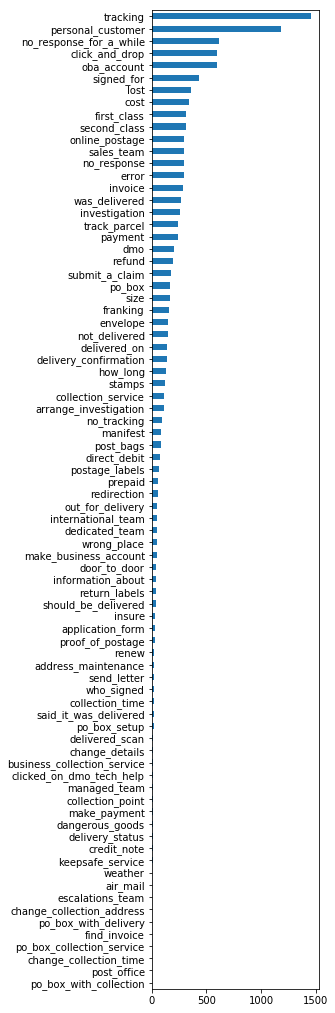

In [94]:
_ = data[cols].sum().sort_values().plot(kind='barh', figsize=(3,18))

### 6. Calculate percent of non_enriched conversations

In [95]:
data['totals'] = data[cols].sum(axis=1)

In [96]:
data.loc[data['totals'] == 0].shape[0] / data.shape[0]

0.09948604992657856

### 7. Export reduced data for manual inspection

In [97]:
reduced = df[['chat_id', 'participant', 'text']].merge(data[['chat_id', 'totals']], on='chat_id', how='right')

In [98]:
reduced.loc[reduced['totals'] == 0].to_csv('../data/reduced.csv', index=False)

### 8. Export enriched data for data visualization

In [99]:
# Add back extra columns
data = data.merge(df.drop(['participant', 'participant_anon', 'datetime', 'text'], axis=1).drop_duplicates('chat_id'), on='chat_id', how='left')

In [101]:
data.shape

(5448, 99)

In [116]:
data.head()

chat_id  \
0   330558   
1   348315   
2   349710   
3   352898   
4   352900   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text  \
0  i’m very sorry, i would need to transfer you through to our redirections team to deal with this. please allow a moment while i do so.  hi, i recently paid for postal redirection and today someone else's post from another address was redirected to me can you see my last message? yes chloe, one  moment please ro catch up  ok, i am sorry to hear this, please confirm both addresses and dob ? *to my address the redirection is from: 14 etna road, bury st. edmunds, suffolk, ip33 1jf. redirect to: 20 tutelina drive, great welneatham, bury st. edmunds ip30 0tx dob: 18/07/1988 i received post meant for 10 etna road ok, please also confirm the registration email address as this is separate to the email given today ? i didn't provide an email today? only my name. i think it was omniflo@protonmail....   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  "you're through to business customer services; <br />can i take the business name, address & postcode please?"    
2                                                                                                                                                                                                                                                                                                                                                                                 hi abdul, unfortunately, you have clicked on the dmo tech help live chat link. as such, we are unable to assist with this type of query. please bear with me whilst i transfer you to the team that can. hi, i see my account dd is not set up i sent dd mandate about 2 weeks ago can you check one of invoice is due today okay. can you tell me how can i make payment via bank transfer because online payment system is not accepting card    
3  good morning maxine.  i’m sorry to hear that.<br /><br />can i take your business address including business name and postcode please?<br /><br />please be aware at the end of this chat, you’ll be presented with an option to complete a short survey at the bottom of the page. your feedback is important to us. i have a problem with my online postage  are you referring to online postage? my email address is ma680@le.ac.uk i was wondering if you could please help with changing the details of my postage to get the help and assistance you need you will need to contact online postage on 03456 113 425. i’m sorry but they are not contactable via online chat. yes order number 8350076  i'm sor

In [110]:
for topic in cols:
    data.loc[data[topic] == 1.0, 'topic_1'] = topic

In [113]:
for topic in cols:
    data.loc[((data[topic] == 1.0) & 
              (data['topic_1'] != topic)), 'topic_2'] = topic

In [115]:
for topic in cols:
    data.loc[((data[topic] == 1.0) & 
              (data['topic_1'] != topic) & 
              (data['topic_2'] != topic)), 'topic_3'] = topic

In [117]:
for topic in cols:
    data.loc[((data[topic] == 1.0) & 
              (data['topic_1'] != topic) & 
              (data['topic_2'] != topic) & 
              (data['topic_3'] != topic)), 'topic_4'] = topic

In [119]:
for topic in cols:
    data.loc[((data[topic] == 1.0) & 
              (data['topic_1'] != topic) & 
              (data['topic_2'] != topic) & 
              (data['topic_3'] != topic) &
              (data['topic_4'] != topic)), 'topic_5'] = topic

In [120]:
for topic in cols:
    data.loc[((data[topic] == 1.0) & 
              (data['topic_1'] != topic) & 
              (data['topic_2'] != topic) & 
              (data['topic_3'] != topic) &
              (data['topic_4'] != topic) &
              (data['topic_5'] != topic)), 'topic_6'] = topic

In [122]:
data.to_csv('../data/to_plot.csv', index=False)

In [121]:
data.totals.value_counts()

2.0     1520
1.0     1515
3.0      884
0.0      542
4.0      509
5.0      249
6.0      132
7.0       55
8.0       25
9.0       12
10.0       4
13.0       1
Name: totals, dtype: int64